In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/fastai-v3/ALL_IDB2"

Go to this URL in a browser: ########
Enter your authorization code:
··········
Mounted at /content/gdrive


import the library

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate
fnames = get_image_files(root_dir)
fnames[:5]

[PosixPath('/content/gdrive/My Drive/fastai-v3/ALL_IDB2/Im238_0.tif'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/ALL_IDB2/Im235_0.tif'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/ALL_IDB2/Im236_0.tif'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/ALL_IDB2/Im239_0.tif'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/ALL_IDB2/Im237_0.tif')]

importing the database and generating the data bunch

In [0]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'
pat = r'/\w+_(\d)\.tif$'

In [0]:
data = ImageDataBunch.from_name_re(root_dir, fnames, pat, ds_tfms=get_transforms(), size=224, bs=64
                                  ).normalize(imagenet_stats)

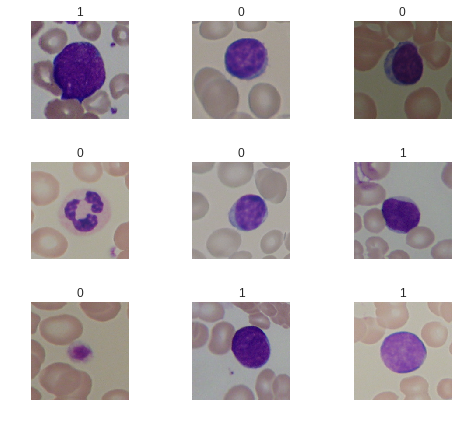

In [0]:
data.show_batch(rows=3, figsize=(7,6))

In [0]:
print(data.classes)
len(data.classes),data.c

['0', '1']


(2, 2)

testing res50 architecture

In [0]:
learn = create_cnn(data, models.resnet50, metrics=error_rate, wd=1e-1)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


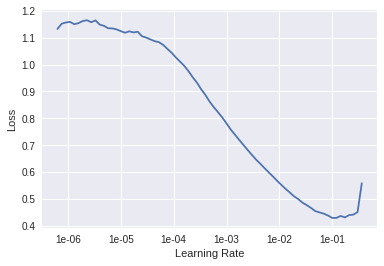

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
lr = 0.001
learn.fit_one_cycle(5, lr)

epoch,train_loss,valid_loss,error_rate,time
1,0.849010,0.680717,0.461538,00:05
2,0.632819,0.491184,0.288462,00:05
3,0.466122,0.368184,0.211538,00:05
4,0.377166,0.307673,0.173077,00:05
5,0.316087,0.313662,0.192308,00:05


In [0]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


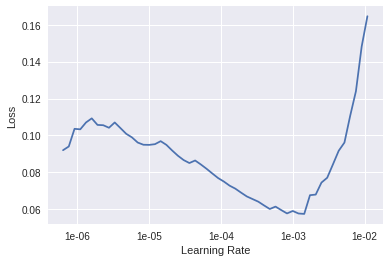

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
lr = 0.0001
learn.fit_one_cycle(5, slice(1e-5, 1e-3))

epoch,train_loss,valid_loss,error_rate,time
1,0.097509,0.378522,0.153846,00:06
2,0.078953,0.460613,0.192308,00:06
3,0.058938,0.329152,0.153846,00:06
4,0.064524,0.218602,0.115385,00:06
5,0.057142,0.113583,0.038462,00:06
